In [8]:
%load_ext rpy2.ipython

Punto 1)

In [2]:
%%R
neonati <- read.csv("/content/neonati.csv", sep= ";")
nrow(neonati)
na_neonati <- na.omit(neonati)
nrow(na_neonati)

[1] 2500


Nel dataset "neonati" ci sono 2500 righe, tante quante quelle presenti nel file csv. In più, si verifica che non ci sono entrate NA nel dataset importato quindi possiamo dedurre che il dataset è importato in maniera corretta.

Punto 2)
Il dataset presenta 10 variabili, ottenute scegliendo un campione di 2500 neonati selezionati da tre ospedali. In particolare, vengono raccolti dati riguardanti la madre ed il neonato per poter prevedere il peso del neonato alla nascita conoscendo altre variabili derivanti da analisi mediche condotte sulla madre e sul neonato.
Inoltre, il dataset presenta 10 variabili di cui:

*   "Anni.madre" è di tipo quantitativo continuo e rappresenta l'età della madre.
*   "N.gravidanze" è di tipo quantitativo discreto ed indica il numero di gravidanze già sostenute dalla madre.
* "Fumatrici" è una variabile di tipo dummy ed è uguale a 0 se la madre non fuma, 1 altrimenti.
* "Gestazione" è di tipo quantitativo continuo e rappresenta il numero di settimane di gestazione.
* "Lunghezza" e "Cranio" sono quantitative continue anche se sono di tipo intero nel dataset, indicano rispettivamente lunghezza e diametro del cranio del neonato in millimetri.
*  "Tipo.parto" , "Ospedale" e "Sesso" sono di tipo qualitativo su scala nominale. La variabile "Tipo.parto" ha due modalità ovvero "Nat" che indica il parto naturale oppure "Ces" che indica il parto cesareo. La variabile ospedale ha tre modalità che indicano in quale ospedale è avvenuto il parto. La variabile sesso ha due modalità che indicano il sesso del neonato.


Punto 3)
Indagando le variabili del dataset si osserva che per quanto riguarda la variabile "anni.madre" c'è un valore minimo di 0 e una osservazione con valore uguale ad 1. Questi valori non sono plausibili e sono dovuti probabilmente ad un errore nel campionamento o ad un errore nel caricamento dati. Si può scegliere se cancellare le due righe oppure se sostituire questi valori con la media. Visto che le altre variabili di queste due osservazioni sono abbastanza coerenti, si può sostituire il valore dell'età della madre con la media. Si osserva che in effetti questi due valori sono presenti anche sul file csv, (riga 1380 e 1152) quindi possiamo escludere che il problema sia dovuto ad un errore nel caricamento dati.

In [3]:
%%R
neonati[which(neonati$Anni.madre==0),1] <- mean(neonati$Anni.madre)
neonati[which(neonati$Anni.madre==1),1] <- mean(neonati$Anni.madre)
summary(neonati$Anni.madre)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13.00   25.00   28.00   28.19   32.00   46.00 


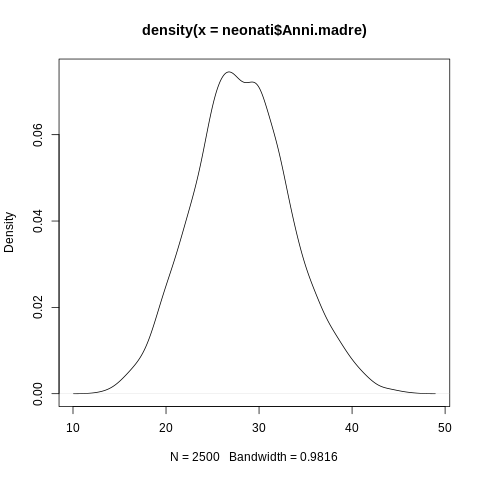

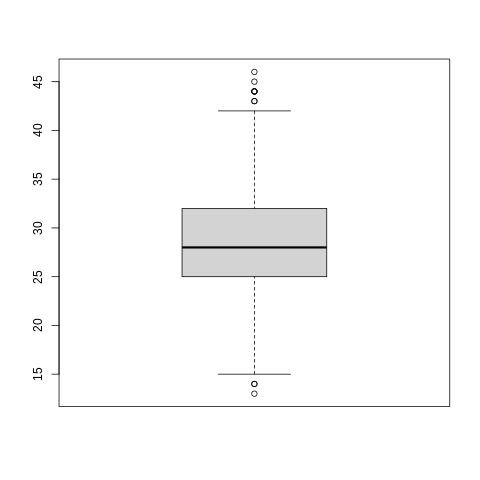

In [ ]:
%%R
plot(density(neonati$Anni.madre))
boxplot(neonati$Anni.madre)

Come ci si può aspettare, i valori di questa variabile si concentrano intorno alla media, dunque la densità di questa distribuzione somiglia ad una Gaussiana con media circa 28.

In [ ]:
%%R
summary(neonati$N.gravidanze)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  1.0000  0.9812  1.0000 12.0000 


Dal momento che il terzo quartile è pari ad uno, si può osservare che il 75% delle madri presenti in questo dataset ha avuto una oppure nessuna gravidanza precedente.

In [ ]:
%%R
table(neonati$N.gravidanze)


   0    1    2    3    4    5    6    7    8    9   10   11   12 
1096  818  340  150   48   21   11    1    8    2    3    1    1 


In questo dataset la maggior parte delle madri non ha avuto precedenti gravidanze.

In [ ]:
%%R
summary(neonati$Fumatrici)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.0416  0.0000  1.0000 


In questo campione almeno il 75% delle madri non fuma.

In [ ]:
%%R
table(neonati$Fumatrici)


   0    1 
2396  104 


In [ ]:
%%R
summary(neonati$Gestazione)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  25.00   38.00   39.00   38.98   40.00   43.00 


In [ ]:
%%R
table(neonati$Gestazione)


 25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43 
  1   1   2   4   3   5   8   9  18  16  33  62 192 437 581 741 329  56   2 


Per quanto riguarda la variabile "gestazione", il 75% dei dati è compreso tra il valore di 38 e 40.

In [ ]:
%%R
summary(neonati$Peso)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    830    2990    3300    3284    3620    4930 


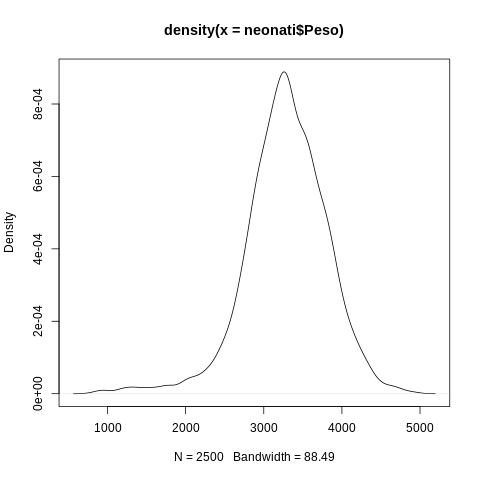

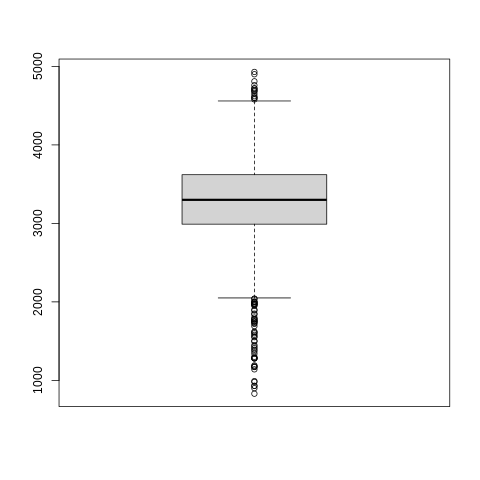

In [ ]:
%%R
plot(density(neonati$Peso))
boxplot(neonati$Peso)

In questo caso si osserva dai grafici e dal summary che la variabile peso si distribuisce circa come una Gaussiana con media 3284.

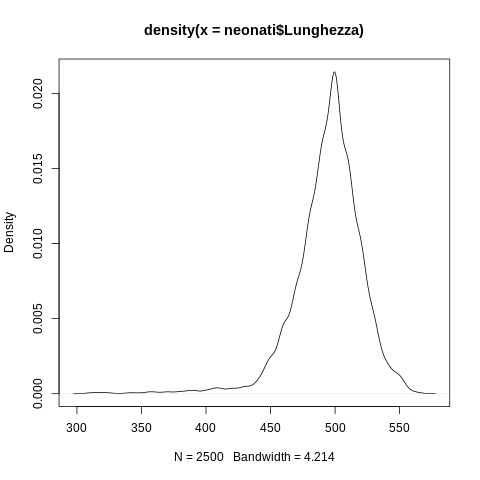

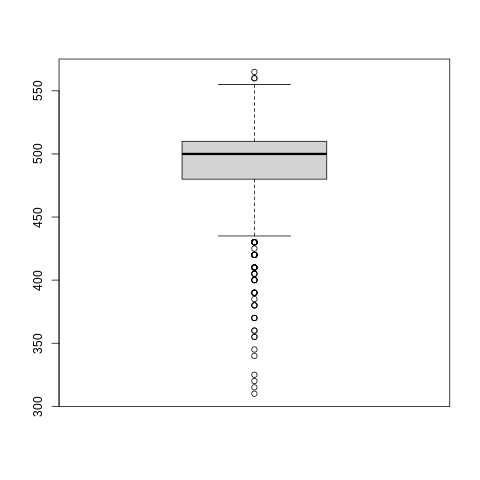

In [ ]:
%%R
plot(density(neonati$Lunghezza))
boxplot(neonati$Lunghezza)

In [ ]:
%%R
summary(neonati$Lunghezza)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  310.0   480.0   500.0   494.7   510.0   565.0 


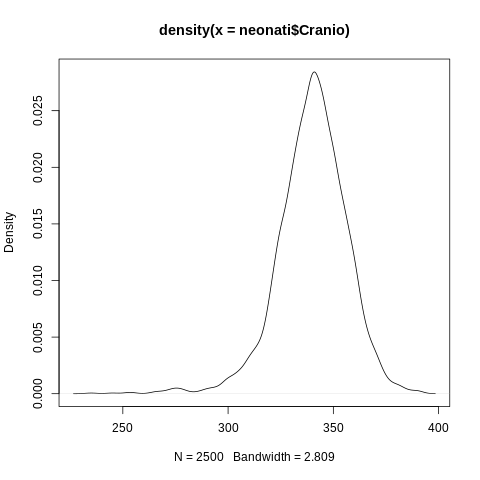

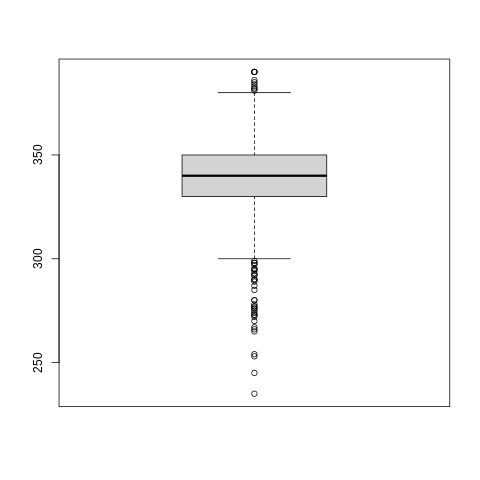

In [ ]:
%%R
plot(density(neonati$Cranio))
boxplot(neonati$Cranio)

In [ ]:
%%R
summary(neonati$Cranio)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    235     330     340     340     350     390 


Tramite le seguenti righe di codice invece si analizza la frequenza delle modalità delle variabili carattere.

In [ ]:
%%R
table(neonati$Tipo.parto)/2500


   Ces    Nat 
0.2912 0.7088 


In [ ]:
%%R
table(neonati$Ospedale)/2500


  osp1   osp2   osp3 
0.3264 0.3396 0.3340 


In [ ]:
%%R
table(neonati$Sesso)/2500


     F      M 
0.5024 0.4976 


Punto 4)
Da una ricerca dell'ospedale pediatrico bambino Gesù di Roma( https://www.ospedalebambinogesu.it/da-0-a-30-giorni-come-si-presenta-e-come-cresce-80012/#:~:text=In%20media%20il%20peso%20nascita,pari%20mediamente%20a%2050%20centimetri)  emerge che la media del peso di un neonato è di 3300 grammi e che vengono considerati normali anche pesi che variano tra 2500 e 4500 grammi. Si può pertanto modellizzare la distribuzione del peso di un neonato con una Gaussiana di media 3300. Dalla ricerca si può provare ad ipotizzare che la varianza di questa distribuzione (non nota) sia di 1000 e pertanto iniziare ad eseguire un test z per la verifica dell'ipotesi che la media del peso dei neonati di questo campione sia uguale a quella della popolazione.
In particolare l'ipotesi nulla sarà media = 3300 e l'alternativa sarà media diversa da 3300. Fissiamo alfa= 0.05 come livello di significatività


In [ ]:
%%R
install.packages("TeachingDemos")

In [ ]:
%%R
library(TeachingDemos)

z.test(neonati$Peso,
       3300,
       stdev = 1000,
       alternative= "two.sided",
       conf.level = 0.95)


	One Sample z-test

data:  neonati$Peso
z = -0.79596, n = 2500, Std. Dev. = 1000, Std. Dev. of the sample mean
= 20, p-value = 0.4261
alternative hypothesis: true mean is not equal to 3300
95 percent confidence interval:
 3244.882 3323.280
sample estimates:
mean of neonati$Peso 
            3284.081 



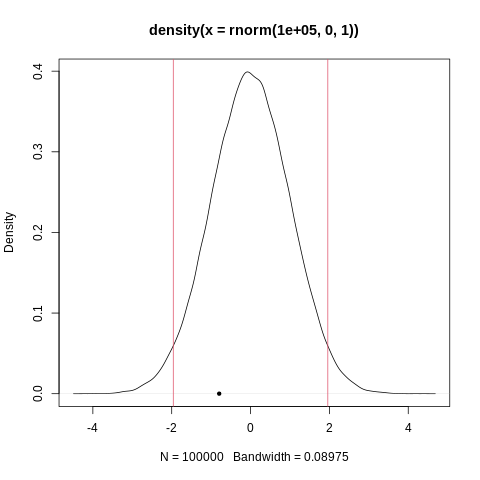

In [ ]:
%%R
valori_soglia <- qnorm(c(0.05/2 , 1-0.05/2))

plot(   density(rnorm(100000,0,1))   )
abline( v=valori_soglia , col=2  )
points(x=-0.796 , y=0, pch =20)

La statistica test ricade all'interno della zona di accettazione, il p-value è pari a circa 0.42 quindi più alto del livello di significatività del 5%, l'intervallo di confidenza contiene il valore del parametro sotto l'ipotesi nulla e pertanto non rifiutiamo l'ipotesi nulla; ovvero la media del campione non è significativamente diversa dalla media della popolazione.

Visto che però la varianza non è nota, proviamo un t-test che sembra più adatto allo scenario. \\
In particolare, effettuiamo un t-test con livello di significatività alfa=0.05

In [ ]:
%%R
t.test(neonati$Peso,
       mu = 3300,
       conf.level = 0.95,
       alternative = "two.sided")


	One Sample t-test

data:  neonati$Peso
t = -1.516, df = 2499, p-value = 0.1296
alternative hypothesis: true mean is not equal to 3300
95 percent confidence interval:
 3263.490 3304.672
sample estimates:
mean of x 
 3284.081 



In [ ]:
%%R
qt(0.025, 5)

[1] -2.570582


La statistica test ricade nella zona di accettazione dell'ipotesi nulla, il p-value è più alto del livello di significatività, la media ricade all'interno dell'intervallo di confidenza e quindi deduciamo che anche in questo caso non si rifiuta l'ipotesi nulla e pertanto la media del campione non è significativamente diversa rispetto alla media della popolazione.

Da una ricerca sulla lunghezza di un neonato emerge che la lunghezza media di un neonato è di 500 mm. Dunque in questo caso saggiamo l'ipotesi H0: media = 500 contro H1: media diversa da 500.

In [ ]:
%%R
t.test(neonati$Lunghezza,
       mu = 500,
       conf.level = 0.95,
       alternative = "two.sided")


	One Sample t-test

data:  neonati$Lunghezza
t = -10.084, df = 2499, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 500
95 percent confidence interval:
 493.6598 495.7242
sample estimates:
mean of x 
  494.692 



In questo caso la statistica test è nella zona di rifiuto, il p-value è minore del livello di significatività e il valore del parametro non è nell'intervallo di confidenza, perciò si rifiuta l'ipotesi nulla e si deduce che la media della lunghezza di questo campione è significativamente diversa da quella della popolazione.

Punto 5)

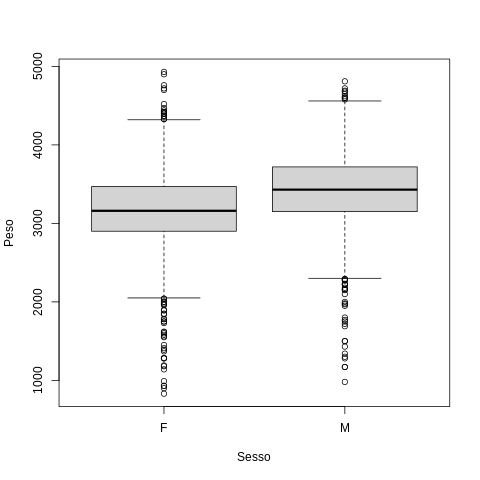

In [ ]:
%%R
boxplot(Peso ~ Sesso , data = neonati)

In [ ]:
%%R
summary(neonati[neonati$Sesso=="M",]$Peso)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    980    3150    3430    3408    3720    4810 


In [ ]:
%%R
summary(neonati[neonati$Sesso=="F",]$Peso)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    830    2900    3160    3161    3470    4930 


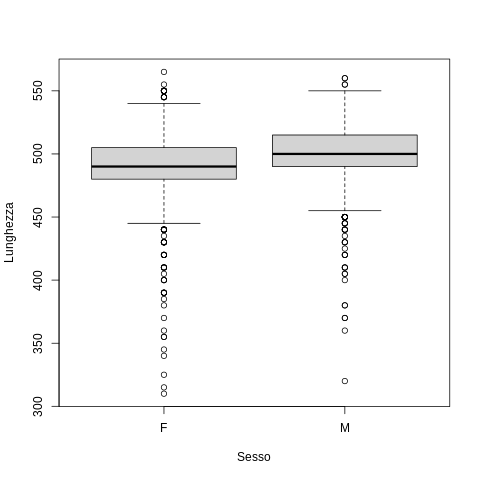

In [ ]:
%%R
boxplot(Lunghezza ~ Sesso , data = neonati)

In [ ]:
%%R
summary(neonati[neonati$Sesso=="M",]$Lunghezza)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  320.0   490.0   500.0   499.7   515.0   560.0 


In [ ]:
%%R
summary(neonati[neonati$Sesso=="F",]$Lunghezza)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  310.0   480.0   490.0   489.8   505.0   565.0 


In questo caso, per poter effettuare un t-test per il confronto tra gruppi si deve prima verificare che vengano rispettate le assunzioni di normalità ed omoschedasticità delle variabili considerate. Proviamo innanzitutto il test di Shapiro-Wilk per verificare la normalità e fissiamo alfa=0.05

In [ ]:
%%R
shapiro.test(neonati$Peso)


	Shapiro-Wilk normality test

data:  neonati$Peso
W = 0.97066, p-value < 2.2e-16



In [ ]:
%%R
shapiro.test(neonati$Lunghezza)


	Shapiro-Wilk normality test

data:  neonati$Lunghezza
W = 0.90941, p-value < 2.2e-16



Poichè il p-value è molto più piccolo del livello di significatività, viene rifiutata l'ipotesi nulla ovvero quella di normalità per entrambe le variabili e dunque non possiamo utilizzare un t-test per confrontare le medie raggruppate sui due sessi. Procediamo quindi con il test di Wilcoxon, in cui l'ipotesi nulla è quella secondo cui non ci sono differenze significative tra i due gruppi.

In [ ]:
%%R
pairwise.wilcox.test(neonati$Peso,
                     neonati$Sesso,
                     paired=F,
                     pool.sd=T,
                     p.adjust.method = "bonferroni")


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  neonati$Peso and neonati$Sesso 

  F     
M <2e-16

P value adjustment method: bonferroni 


In [ ]:
%%R
pairwise.wilcox.test(neonati$Lunghezza,
                     neonati$Sesso,
                     paired=F,
                     pool.sd=T,
                     p.adjust.method = "bonferroni")


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  neonati$Lunghezza and neonati$Sesso 

  F     
M <2e-16

P value adjustment method: bonferroni 


In entrambi i casi il p-value è molto più piccolo del livello di significatività, si rifiuta quindi l'ipotesi nulla e dunque si conclude che ci sono differenze significative tra i due gruppi sia per la variabile lunghezza sia per la variabile peso.

Punto 6)

In [ ]:
%%R
table(neonati[neonati$Ospedale=="osp1",]$Tipo.parto)


Ces Nat 
242 574 


In [ ]:
%%R
table(neonati[neonati$Ospedale=="osp2",]$Tipo.parto)


Ces Nat 
254 595 


In [ ]:
%%R
table(neonati[neonati$Ospedale=="osp3",]$Tipo.parto)


Ces Nat 
232 603 


Dai confronti delle frequenze della tipologia di parto raggruppate per ospedale, non sembrano esserci particolari differenze sul numero di parti cesarei nei tre ospedali.

In [ ]:
%%R
neonati$tipo_parto_num <- ifelse(neonati$Tipo.parto=="Nat", 0 , 1)

In [ ]:
%%R
shapiro.test(neonati$tipo_parto_num)


	Shapiro-Wilk normality test

data:  neonati$tipo_parto_num
W = 0.56987, p-value < 2.2e-16



Il test di Shapiro-Wilk produce un p-value molto sotto il livello di significatività del 5% e quindi si rifiuta l'ipotesi di normalità della variabile "tipo_parto_num" che è la variabile dummy ottenuta a partire dalla variabile carattere "tipo.parto". Dunque procediamo con il test di Wilcoxon anche in questo caso.

In [ ]:
%%R
pairwise.wilcox.test(neonati$tipo_parto_num,
                     neonati$Ospedale,
                     paired=F,
                     pool.sd=T,
                     p.adjust.method = "bonferroni")

Il p-value è sempre uno per qualsiasi confronto dei tre ospedali, si può quindi concludere che non ci sono differenze significative sulla tipologia di parto tra i vari ospedali.

In alternativa si può utilizzare il test del chi quadro per verificare l'indipendenza delle due variabili.

In [19]:
%%R
tabella <- table(neonati$Tipo.parto, neonati$Ospedale)
tabella

     
      osp1 osp2 osp3
  Ces  242  254  232
  Nat  574  595  603


In [18]:
%%R
test.indipendenza <- chisq.test(tabella)
test.indipendenza


	Pearson's Chi-squared test

data:  tabella
X-squared = 1.0972, df = 2, p-value = 0.5778



Il p-value è al di sopra del livello di significatività fissato al 5% e quindi non si può rifiutare l'ipotesi nulla di indipendenza tra le due variabili.

Analisi multidimensionale

Punto 1)

Innanzitutto trasformiamo le variabili qualitative in dummy per poter usare la funzione pairs per individuare le relazioni tra le variabili a due a due.

In [ ]:
%%R
neonati$Tipo.parto <- as.factor(neonati$Tipo.parto)
neonati$Ospedale <- as.factor(neonati$Ospedale)
neonati$Sesso <- as.factor(neonati$Sesso)

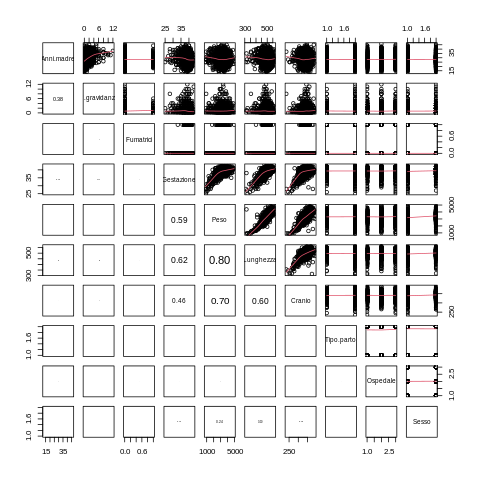

In [ ]:
%%R
panel.cor <- function(x, y, digits = 2, prefix = "", cex.cor, ...)
{
  par(usr = c(0, 1, 0, 1))
  r <- abs(cor(x, y))
  txt <- format(c(r, 0.123456789), digits = digits)[1]
  txt <- paste0(prefix, txt)
  if(missing(cex.cor)) cex.cor <- 0.8/strwidth(txt)
  text(0.5, 0.5, txt, cex = cex.cor * r)
}

pairs(neonati, upper.panel = panel.smooth , lower.panel= panel.cor  )

Indaghiamo innanzitutto le correlazioni tra la variabile risposta e le variabili esplicative. Si può osservare che la variabile peso ha una alta correlazione positiva con le variabili lunghezza e cranio, come effettivamente ci si può aspettare, all'aumentare della lunghezza aumenta il peso e all'aumentare del diametro del cranio aumenta il peso. C'è una correlazione positiva anche tra la variabile peso e la variabile gestazione. \\
Tra le variabili esplicative si osserva una correlazione positiva tra anni.madre e n.gravidanze (come ci si aspetta); inoltre c'è una correlazione positiva tra le variabili cranio e lunghezza e tra le variabili gestazione e lunghezza e gestazione e cranio. Questo potrebbe causare problemi di multicollinearità \\
Effettivamente, come ci si può aspettare, maggiore è il numero di settimane di gestazione e maggiore è il diametro del cranio, la lunghezza ed il peso.

Si possono visualizzare i boxplot per le variabili qualitative.

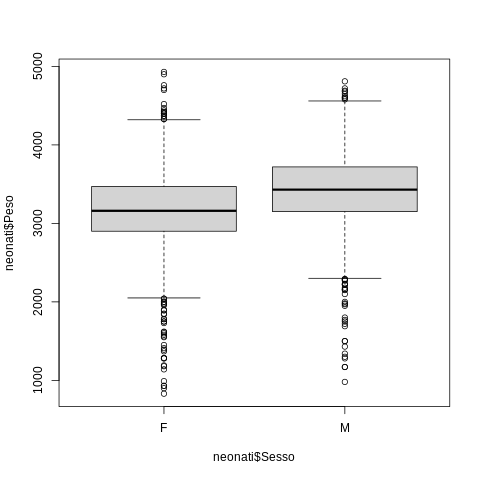

In [ ]:
%%R
boxplot(neonati$Peso ~ neonati$Sesso)

In questo caso sembra esserci effettivamente una differenza di peso tra maschi e femmine.

In [ ]:
%%R
t.test(neonati$Peso ~ neonati$Sesso)


	Welch Two Sample t-test

data:  neonati$Peso by neonati$Sesso
t = -12.106, df = 2490.7, p-value < 2.2e-16
alternative hypothesis: true difference in means between group F and group M is not equal to 0
95 percent confidence interval:
 -287.1051 -207.0615
sample estimates:
mean in group F mean in group M 
       3161.132        3408.215 



Anche il t-test conferma che c'è una differenza significativa della media del peso tra maschi e femmine.

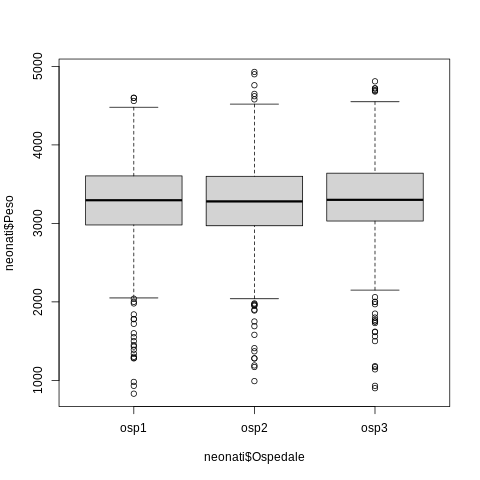

In [ ]:
%%R
boxplot(neonati$Peso ~ neonati$Ospedale)

In questo caso non sembrano esserci differenze significative di peso tra i neonati dei tre ospedali.

In [ ]:
%%R
pairwise.t.test(neonati$Peso , neonati$Ospedale,
                paired=F,
                pool.sd=T,
                p.adjust.method= "bonferroni")


	Pairwise comparisons using t tests with pooled SD 

data:  neonati$Peso and neonati$Ospedale 

     osp1 osp2
osp2 1.00 -   
osp3 0.33 0.33

P value adjustment method: bonferroni 


Il t test conferma che non ci sono differenze significative del peso dei neonati tra i tre ospedali.

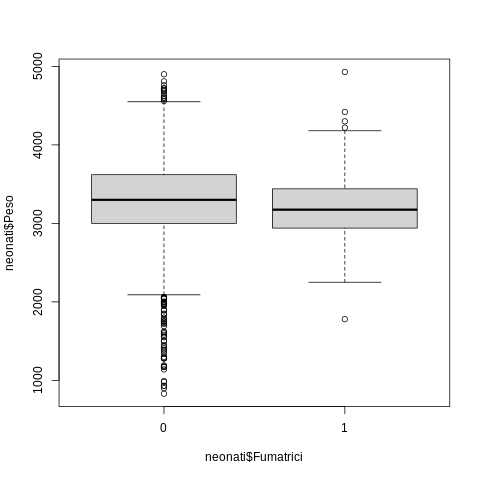

In [ ]:
%%R
boxplot(neonati$Peso ~ neonati$Fumatrici)

In [ ]:
%%R
t.test(neonati$Peso ~ neonati$Fumatrici)


	Welch Two Sample t-test

data:  neonati$Peso by neonati$Fumatrici
t = 1.034, df = 114.1, p-value = 0.3033
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -45.61354 145.22674
sample estimates:
mean in group 0 mean in group 1 
       3286.153        3236.346 



In questo caso non viene rifiutata l'ipotesi nulla di uguaglianza tra medie del peso dei neonati tra madri fumatrici e non fumatrici.

Punto 2)

In [20]:
%%R
mod1 <- lm(Peso ~ ., data = neonati)
summary(mod1)


Call:
lm(formula = Peso ~ ., data = neonati)

Residuals:
    Min      1Q  Median      3Q     Max 
-1123.3  -181.2   -14.6   160.7  2612.6 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -6735.1425   141.3974 -47.633  < 2e-16 ***
Anni.madre        0.7976     1.1463   0.696   0.4866    
N.gravidanze     11.4129     4.6665   2.446   0.0145 *  
Fumatrici       -30.1567    27.5396  -1.095   0.2736    
Gestazione       32.5262     3.8179   8.519  < 2e-16 ***
Lunghezza        10.2951     0.3007  34.237  < 2e-16 ***
Cranio           10.4725     0.4261  24.580  < 2e-16 ***
Tipo.partoNat    29.5026    12.0848   2.441   0.0147 *  
Ospedaleosp2    -11.2217    13.4388  -0.835   0.4038    
Ospedaleosp3     28.0985    13.4972   2.082   0.0375 *  
SessoM           77.5473    11.1779   6.938 5.07e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 273.9 on 2489 degrees of freedom
Multiple R-squared:  0.7289,	Adjust

Come è emerso anche dal punto precedente, le variabili più correlate alla variabile peso sono gestazione, lunghezza e cranio. \
In particolare, per ogni settimana di gestazione in più si ha un aumento di circa 32 grammi; per ogni millimetro in più di lunghezza si ha un aumento di circa 10 grammi di peso e per ogni millimetro in più di diametro del cranio si ha un aumento di circa 10 grammi di peso.\
Per la variabile n.gravidanze si osserva che ad un aumento unitario del numero di gravidanze della madre aumenta di circa 11 grammi il peso del neonato ma il livello di significatività in questo caso è più basso dei precedenti.\
Indaghiamo ora le variabili qualitative:
*   Per la variabile sesso, si osserva che tenendo fissate le altre variabili nei maschi si rileva un peso medio di circa 77 grammi in più con un livello molto elevato di significatività
*  Per la variabile tipo.parto si osserva che i neonati con parto naturale pesano circa 29 grammi in più rispetto a quelli nati con parto cesareo, con un livello di significatività non molto alto.
*  Per la variabile ospedale si osserva che i neonati dell'ospedale 3 hanno un peso mediamente più grande di circa 29 grammi rispetto ai neonati degli altri ospedali.

Per questo modello, le restanti variabili non sono significative.
Il valore dell'r quadro aggiustato mostra che c'è circa un 72% di variabilità spiegata, quindi sembra che possa essere migliorato.




Punto 3)
Proviamo a scegliere il modello migliore con la procedura stepwise mixed. Consideriamo innanzitutto il modello ottenuto con la variabile lunghezza che è molto significativa per quello che emerge dal punto precedente.

In [21]:
%%R
reg_mod2 <- lm(Peso~ Lunghezza , data=neonati)
summary(reg_mod2)


Call:
lm(formula = Peso ~ Lunghezza, data = neonati)

Residuals:
    Min      1Q  Median      3Q     Max 
-1478.4  -206.0   -22.4   190.4  3939.5 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4571.8176   119.6778  -38.20   <2e-16 ***
Lunghezza      15.8804     0.2416   65.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 317.8 on 2498 degrees of freedom
Multiple R-squared:  0.6337,	Adjusted R-squared:  0.6335 
F-statistic:  4321 on 1 and 2498 DF,  p-value: < 2.2e-16



L'r quadro aggiustato è abbastanza basso con una sola variabile esplicativa.

In [22]:
%%R
reg_mod3 <- update(reg_mod2, ~.+ Cranio)
summary(reg_mod3)


Call:
lm(formula = Peso ~ Lunghezza + Cranio, data = neonati)

Residuals:
     Min       1Q   Median       3Q      Max 
-1295.09  -184.36   -11.95   162.85  2792.61 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6306.9134   124.8791  -50.50   <2e-16 ***
Lunghezza      11.6312     0.2682   43.37   <2e-16 ***
Cranio         11.2847     0.4298   26.26   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 281.4 on 2497 degrees of freedom
Multiple R-squared:  0.7129,	Adjusted R-squared:  0.7127 
F-statistic:  3101 on 2 and 2497 DF,  p-value: < 2.2e-16



In [23]:
%%R
reg_mod4 <-update(reg_mod3, ~.+ Gestazione)
summary(reg_mod4)


Call:
lm(formula = Peso ~ Lunghezza + Cranio + Gestazione, data = neonati)

Residuals:
     Min       1Q   Median       3Q      Max 
-1105.77  -183.25   -12.83   166.41  2623.80 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6777.1203   135.6417 -49.963   <2e-16 ***
Lunghezza      10.4252     0.3020  34.522   <2e-16 ***
Cranio         10.7892     0.4282  25.194   <2e-16 ***
Gestazione     31.6901     3.8219   8.292   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 277.7 on 2496 degrees of freedom
Multiple R-squared:  0.7206,	Adjusted R-squared:  0.7203 
F-statistic:  2146 on 3 and 2496 DF,  p-value: < 2.2e-16



Per il modello 3 viene raggiungo un 72% circa di varianza spiegata.

In [24]:
%%R
reg_mod5 <- update(reg_mod4, ~.+ Sesso)
summary(reg_mod5)


Call:
lm(formula = Peso ~ Lunghezza + Cranio + Gestazione + Sesso, 
    data = neonati)

Residuals:
    Min      1Q  Median      3Q     Max 
-1138.2  -184.3   -17.6   163.3  2627.3 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6651.1188   135.5172 -49.080  < 2e-16 ***
Lunghezza      10.2054     0.3007  33.939  < 2e-16 ***
Cranio         10.6704     0.4245  25.139  < 2e-16 ***
Gestazione     31.2737     3.7856   8.261 2.31e-16 ***
SessoM         79.1049    11.2117   7.056 2.22e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 275 on 2495 degrees of freedom
Multiple R-squared:  0.7261,	Adjusted R-squared:  0.7257 
F-statistic:  1654 on 4 and 2495 DF,  p-value: < 2.2e-16



Per il modello precedente tutte le variabili restano significative e l'r quadro aggiustato è migliorato di mezzo punto percentuale.

In [25]:
%%R
reg_mod6 <- update(reg_mod5, ~.+ N.gravidanze)
summary(reg_mod6)


Call:
lm(formula = Peso ~ Lunghezza + Cranio + Gestazione + Sesso + 
    N.gravidanze, data = neonati)

Residuals:
     Min       1Q   Median       3Q      Max 
-1149.44  -180.81   -15.58   163.64  2639.72 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -6681.1445   135.7229 -49.226  < 2e-16 ***
Lunghezza       10.2486     0.3006  34.090  < 2e-16 ***
Cranio          10.5402     0.4262  24.728  < 2e-16 ***
Gestazione      32.3321     3.7980   8.513  < 2e-16 ***
SessoM          77.9927    11.2021   6.962 4.26e-12 ***
N.gravidanze    12.4750     4.3396   2.875  0.00408 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 274.6 on 2494 degrees of freedom
Multiple R-squared:  0.727,	Adjusted R-squared:  0.7265 
F-statistic:  1328 on 5 and 2494 DF,  p-value: < 2.2e-16



L'r quadro migliora di poco aggiungendo la variabile n.gravidanze.

In [26]:
%%R
reg_mod7 <- update(reg_mod6, ~. + Tipo.parto)
summary(reg_mod7)


Call:
lm(formula = Peso ~ Lunghezza + Cranio + Gestazione + Sesso + 
    N.gravidanze + Tipo.parto, data = neonati)

Residuals:
     Min       1Q   Median       3Q      Max 
-1129.31  -181.70   -16.31   161.07  2638.85 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -6707.2971   135.9911 -49.322  < 2e-16 ***
Lunghezza        10.2864     0.3007  34.207  < 2e-16 ***
Cranio           10.5057     0.4260  24.659  < 2e-16 ***
Gestazione       32.2713     3.7941   8.506  < 2e-16 ***
SessoM           77.9285    11.1905   6.964 4.22e-12 ***
N.gravidanze     12.7558     4.3366   2.941   0.0033 ** 
Tipo.partoNat    30.0342    12.0969   2.483   0.0131 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 274.3 on 2493 degrees of freedom
Multiple R-squared:  0.7277,	Adjusted R-squared:  0.727 
F-statistic:  1110 on 6 and 2493 DF,  p-value: < 2.2e-16



Anche se l'r quadro migliora di poco, la variabile tipo.parto non sembra migliorare molto il modello, in più è una variabile che difficilmente si conosce con certezza prima del parto e dunque probabilmente poco utile se vogliamo prevedere il peso del neonato. Decido pertanto di non considerare questa variabile.

In [27]:
%%R
reg_mod8 <- update(reg_mod6, ~. + Anni.madre)
summary(reg_mod8)


Call:
lm(formula = Peso ~ Lunghezza + Cranio + Gestazione + Sesso + 
    N.gravidanze + Anni.madre, data = neonati)

Residuals:
     Min       1Q   Median       3Q      Max 
-1159.87  -181.74   -15.18   164.25  2634.66 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -6711.3578   141.2598 -47.511  < 2e-16 ***
Lunghezza       10.2492     0.3007  34.089  < 2e-16 ***
Cranio          10.5233     0.4268  24.654  < 2e-16 ***
Gestazione      32.6391     3.8190   8.546  < 2e-16 ***
SessoM          77.9113    11.2035   6.954 4.51e-12 ***
N.gravidanze    11.1459     4.6688   2.387    0.017 *  
Anni.madre       0.8871     1.1487   0.772    0.440    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 274.6 on 2493 degrees of freedom
Multiple R-squared:  0.7271,	Adjusted R-squared:  0.7264 
F-statistic:  1107 on 6 and 2493 DF,  p-value: < 2.2e-16



Si osserva che aggiungendo la variabile anni.madre c'è addirittura un peggioramento dell'r quadro aggiustato rispetto a reg_mod6, la variabile n.gravidanze perde di significatività rispetto a reg_mod6. Perciò questo modello verrà scartato

In [28]:
%%R
reg_mod9 <- update(reg_mod5, ~. + Anni.madre)
summary(reg_mod9)


Call:
lm(formula = Peso ~ Lunghezza + Cranio + Gestazione + Sesso + 
    Anni.madre, data = neonati)

Residuals:
     Min       1Q   Median       3Q      Max 
-1163.06  -184.10   -14.38   163.03  2619.29 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6722.6061   141.3141 -47.572  < 2e-16 ***
Lunghezza      10.2167     0.3006  33.984  < 2e-16 ***
Cranio         10.6045     0.4259  24.900  < 2e-16 ***
Gestazione     32.1719     3.8176   8.427  < 2e-16 ***
SessoM         78.6771    11.2095   7.019 2.87e-12 ***
Anni.madre      1.8980     1.0688   1.776   0.0759 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 274.9 on 2494 degrees of freedom
Multiple R-squared:  0.7264,	Adjusted R-squared:  0.7259 
F-statistic:  1325 on 5 and 2494 DF,  p-value: < 2.2e-16



Aggiungendo la variabile anni.madre al modello senza la variabile n.gravidanze si osserva che l'r quadro aggiustato resta più o meno uguale, ma comunque la significatività di anni.madre è minore rispetto a quella di n.gravidanze in reg_mod6. Perciò questo lascia pensare che anche questo modello è da scartare.

In [29]:
%%R
reg_mod10 <- update(reg_mod6, ~.+Fumatrici)
summary(reg_mod10)


Call:
lm(formula = Peso ~ Lunghezza + Cranio + Gestazione + Sesso + 
    N.gravidanze + Fumatrici, data = neonati)

Residuals:
    Min      1Q  Median      3Q     Max 
-1150.3  -181.3   -15.7   163.0  2636.3 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -6681.6714   135.7178 -49.232  < 2e-16 ***
Lunghezza       10.2341     0.3009  34.011  < 2e-16 ***
Cranio          10.5359     0.4262  24.718  < 2e-16 ***
Gestazione      32.5914     3.8051   8.565  < 2e-16 ***
SessoM          78.1713    11.2028   6.978 3.83e-12 ***
N.gravidanze    12.7185     4.3450   2.927  0.00345 ** 
Fumatrici      -30.4634    27.5948  -1.104  0.26972    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 274.6 on 2493 degrees of freedom
Multiple R-squared:  0.7271,	Adjusted R-squared:  0.7265 
F-statistic:  1107 on 6 and 2493 DF,  p-value: < 2.2e-16



La variabile fumatrici non sembra migliorare il modello.

In [30]:
%%R
reg_mod11 <- update(reg_mod6, ~.+Ospedale)
summary(reg_mod11)


Call:
lm(formula = Peso ~ Lunghezza + Cranio + Gestazione + Sesso + 
    N.gravidanze + Ospedale, data = neonati)

Residuals:
     Min       1Q   Median       3Q      Max 
-1132.59  -183.63   -16.59   163.83  2620.70 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -6682.0094   135.6710 -49.252  < 2e-16 ***
Lunghezza       10.2720     0.3003  34.204  < 2e-16 ***
Cranio          10.5257     0.4256  24.729  < 2e-16 ***
Gestazione      32.0456     3.7933   8.448  < 2e-16 ***
SessoM          77.4967    11.1865   6.928 5.42e-12 ***
N.gravidanze    12.0824     4.3352   2.787  0.00536 ** 
Ospedaleosp2   -11.0741    13.4494  -0.823  0.41036    
Ospedaleosp3    29.1990    13.4998   2.163  0.03064 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 274.2 on 2492 degrees of freedom
Multiple R-squared:  0.7281,	Adjusted R-squared:  0.7273 
F-statistic: 953.1 on 7 and 2492 DF,  p-value: < 2.2e-16



La variabile Ospedale migliora di poco l'r quadro aggiustato.

In [31]:
%%R
BIC(reg_mod3 , reg_mod4, reg_mod5, reg_mod6 , reg_mod11 )

          df      BIC
reg_mod3   4 35322.22
reg_mod4   5 35262.11
reg_mod5   6 35220.54
reg_mod6   7 35220.10
reg_mod11  9 35226.09


In [32]:
%%R
AIC(reg_mod3 , reg_mod4, reg_mod5, reg_mod6 , reg_mod11 )

          df      AIC
reg_mod3   4 35298.92
reg_mod4   5 35232.99
reg_mod5   6 35185.60
reg_mod6   7 35179.33
reg_mod11  9 35173.68


Dai metodi BIC e AIC sembra che reg_mod5, reg_mod6, reg_mod11 siano i migliori.

In [33]:
%%R
prova<-MASS::stepAIC(mod1, direction="both", k=log(2500))
summary(prova)

Start:  AIC=28139.46
Peso ~ Anni.madre + N.gravidanze + Fumatrici + Gestazione + Lunghezza + 
    Cranio + Tipo.parto + Ospedale + Sesso

               Df Sum of Sq       RSS   AIC
- Anni.madre    1     36327 186809099 28132
- Fumatrici     1     89979 186862751 28133
- Ospedale      2    686401 187459173 28133
- Tipo.parto    1    447229 187220001 28138
- N.gravidanze  1    448852 187221624 28138
<none>                      186772772 28140
- Sesso         1   3611594 190384366 28180
- Gestazione    1   5446480 192219252 28204
- Cranio        1  45338159 232110931 28675
- Lunghezza     1  87959834 274732606 29096

Step:  AIC=28132.12
Peso ~ N.gravidanze + Fumatrici + Gestazione + Lunghezza + Cranio + 
    Tipo.parto + Ospedale + Sesso

               Df Sum of Sq       RSS   AIC
- Fumatrici     1     90897 186899996 28126
- Ospedale      2    692738 187501837 28126
- Tipo.parto    1    448222 187257321 28130
<none>                      186809099 28132
- N.gravidanze  1    633756 18744

La funzione stepwiseAIC sceglie reg_mod6, proviamo con il metodo anova a capire se il modello migliora considerando anche la variabile ospedale.

In [34]:
%%R
anova( reg_mod6 , reg_mod11)

Analysis of Variance Table

Model 1: Peso ~ Lunghezza + Cranio + Gestazione + Sesso + N.gravidanze
Model 2: Peso ~ Lunghezza + Cranio + Gestazione + Sesso + N.gravidanze + 
    Ospedale
  Res.Df       RSS Df Sum of Sq      F   Pr(>F)   
1   2494 188065546                                
2   2492 187340680  2    724866 4.8211 0.008133 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Il test di anova suggerisce che c'è un miglioramento signficativo tra reg_mod6 e reg_mod11; questo perchè il p-valore è molto basso.

Ci troviamo quindi a dover scegliere tra reg_mod6 e reg_mod11; il metodo BIC suggerisce di scegliere reg_mod6 perchè più "parsimonioso", AIC al contrario suggerisce di scegliere reg_mod11. Il p-value della variabile "ospedaleosp3" è di circa il 3% quindi sicuramente sotto la soglia fissata del 5% ma non di tantissimo. Dal boxplot inoltre emerge che non c'è una differenza significativa della media del peso tra i tre ospedali e il t-test relativo non rifiuta l'ipotesi nulla di uguaglianza tra medie. Tuttavia il test di anova dice che il modello reg_mod11 è significativamente migliore rispetto a reg_mod6. Il valore dell'r-quadro aggiustato è molto simile per entrambi i modelli.  \
A questo punto si può scegliere se preferire un modello più semplice (reg_mod6) oppure se preferire un modello più complesso (reg_mod11).

Dal momento che la variabile ospedale non può influire sulle caratteristiche di un neonato, scelgo reg_mod6.

In [35]:
%%R
install.packages("car")

(as ‘lib’ is unspecified)





































































	‘/tmp/RtmpkjogyS/downloaded_packages’



In [36]:
%%R
car::vif(reg_mod6)

   Lunghezza       Cranio   Gestazione        Sesso N.gravidanze 
    2.074689     1.624465     1.669189     1.040054     1.023475 


I valori di vif sono tutti sotto 5 e quindi possiamo concludere che mod_reg6 è il miglior modello di regressione lineare.

Punto 4)


Dal plot del punto 1 dell'analisi multidimensionale sembra esserci una relazione non lineare tra le variabili peso e gestazione, in particolare la nuvola sembra seguire una parabola con la concavità verso il basso. Proviamo perciò ad aggiungere un fattore quadratico al modello trovato al punto precedente.

In [37]:
%%R
reg_mod12 <- update(reg_mod6, ~.+ I(Gestazione^2))
summary(reg_mod12)


Call:
lm(formula = Peso ~ Lunghezza + Cranio + Gestazione + Sesso + 
    N.gravidanze + I(Gestazione^2), data = neonati)

Residuals:
     Min       1Q   Median       3Q      Max 
-1144.11  -181.17   -13.16   165.73  2662.56 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -4650.2268   898.1706  -5.177 2.43e-07 ***
Lunghezza          10.3534     0.3039  34.074  < 2e-16 ***
Cranio             10.6363     0.4280  24.854  < 2e-16 ***
Gestazione        -81.0486    49.7127  -1.630  0.10316    
SessoM             75.7900    11.2340   6.747 1.88e-11 ***
N.gravidanze       12.5660     4.3361   2.898  0.00379 ** 
I(Gestazione^2)     1.5136     0.6617   2.287  0.02226 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 274.4 on 2493 degrees of freedom
Multiple R-squared:  0.7276,	Adjusted R-squared:  0.7269 
F-statistic:  1110 on 6 and 2493 DF,  p-value: < 2.2e-16



C'è un leggerissimo miglioramento dell'r quadro ma la variabile gestazione perde di significatività. Proviamo a togliere la variabile gestazione e a lasciare solo il termine al quadrato.

In [38]:
%%R
reg_mod13 <- update(reg_mod12, ~.-Gestazione )
summary(reg_mod13)


Call:
lm(formula = Peso ~ Lunghezza + Cranio + Sesso + N.gravidanze + 
    I(Gestazione^2), data = neonati)

Residuals:
     Min       1Q   Median       3Q      Max 
-1146.87  -181.09   -15.12   165.40  2643.89 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -6.101e+03  1.235e+02 -49.380  < 2e-16 ***
Lunghezza        1.026e+01  2.987e-01  34.358  < 2e-16 ***
Cranio           1.056e+01  4.255e-01  24.816  < 2e-16 ***
SessoM           7.733e+01  1.120e+01   6.906 6.32e-12 ***
N.gravidanze     1.255e+01  4.338e+00   2.894  0.00383 ** 
I(Gestazione^2)  4.379e-01  5.053e-02   8.667  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 274.5 on 2494 degrees of freedom
Multiple R-squared:  0.7273,	Adjusted R-squared:  0.7267 
F-statistic:  1330 on 5 and 2494 DF,  p-value: < 2.2e-16



L'r quadro aggiustato resta praticamente identico e tutte le variabili sono significative.

In [39]:
%%R
reg_mod14 <- update(reg_mod13, ~.+ Cranio:Gestazione)
summary(reg_mod14)


Call:
lm(formula = Peso ~ Lunghezza + Cranio + Sesso + N.gravidanze + 
    I(Gestazione^2) + Cranio:Gestazione, data = neonati)

Residuals:
     Min       1Q   Median       3Q      Max 
-1140.96  -181.76   -12.27   164.99  2682.54 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -381.5452   867.3880  -0.440  0.66006    
Lunghezza           10.3835     0.2967  35.001  < 2e-16 ***
Cranio             -24.0752     5.2174  -4.614 4.14e-06 ***
SessoM              73.0197    11.1207   6.566 6.26e-11 ***
N.gravidanze        13.3902     4.3022   3.112  0.00188 ** 
I(Gestazione^2)     -3.4672     0.5885  -5.892 4.33e-09 ***
Cranio:Gestazione    0.9003     0.1352   6.660 3.35e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 272.1 on 2493 degrees of freedom
Multiple R-squared:  0.7321,	Adjusted R-squared:  0.7314 
F-statistic:  1135 on 6 and 2493 DF,  p-value: < 2.2e-16



In [40]:
%%R
reg_mod15 <- update(reg_mod14, ~.+ Lunghezza:Gestazione)
summary(reg_mod15)


Call:
lm(formula = Peso ~ Lunghezza + Cranio + Sesso + N.gravidanze + 
    I(Gestazione^2) + Cranio:Gestazione + Lunghezza:Gestazione, 
    data = neonati)

Residuals:
     Min       1Q   Median       3Q      Max 
-1132.81  -180.19   -12.22   165.80  2660.50 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          636.6219   932.2560   0.683 0.494744    
Lunghezza             -1.5383     4.0510  -0.380 0.704181    
Cranio               -13.3509     6.3519  -2.102 0.035662 *  
SessoM                70.6709    11.1320   6.348 2.58e-10 ***
N.gravidanze          13.5951     4.2961   3.165 0.001572 ** 
I(Gestazione^2)       -4.2043     0.6385  -6.585 5.53e-11 ***
Cranio:Gestazione      0.6252     0.1641   3.811 0.000142 ***
Lunghezza:Gestazione   0.3111     0.1054   2.951 0.003199 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 271.7 on 2492 degrees of freedom
Multiple R-squared:  0.733,	Adjusted R-s

In [41]:
%%R
reg_mod16 <- update(reg_mod15, ~.  -Lunghezza -Cranio )
summary(reg_mod16)


Call:
lm(formula = Peso ~ Sesso + N.gravidanze + I(Gestazione^2) + 
    Cranio:Gestazione + Lunghezza:Gestazione, data = neonati)

Residuals:
     Min       1Q   Median       3Q      Max 
-1137.80  -179.25   -11.24   167.84  2647.86 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -1.947e+03  7.020e+01 -27.740  < 2e-16 ***
SessoM                7.252e+01  1.111e+01   6.528 8.05e-11 ***
N.gravidanze          1.315e+01  4.298e+00   3.058  0.00225 ** 
I(Gestazione^2)      -2.455e+00  8.871e-02 -27.680  < 2e-16 ***
Cranio:Gestazione     2.793e-01  1.090e-02  25.625  < 2e-16 ***
Gestazione:Lunghezza  2.701e-01  7.709e-03  35.038  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 272 on 2494 degrees of freedom
Multiple R-squared:  0.7321,	Adjusted R-squared:  0.7316 
F-statistic:  1363 on 5 and 2494 DF,  p-value: < 2.2e-16



In effetti si può pensare alla variabile gestazione come una variabile temporale, ha perciò senso considerare lunghezza e cranio come variabili dipendenti da gestazione e non in senso assoluto. Quindi si possono escludere dal modello e considerare solo l'effetto combinato di lunghezza e gestazione e cranio e gestazione.

In [42]:
%%R
reg_mod17 <- update(reg_mod16, ~. +Lunghezza:Sesso )
summary(reg_mod17)


Call:
lm(formula = Peso ~ Sesso + N.gravidanze + I(Gestazione^2) + 
    Cranio:Gestazione + Gestazione:Lunghezza + Sesso:Lunghezza, 
    data = neonati)

Residuals:
     Min       1Q   Median       3Q      Max 
-1145.39  -179.87   -10.12   165.68  2609.00 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -1.890e+03  8.456e+01 -22.348  < 2e-16 ***
SessoM               -1.875e+02  2.127e+02  -0.881  0.37820    
N.gravidanze          1.328e+01  4.300e+00   3.090  0.00203 ** 
I(Gestazione^2)      -2.414e+00  9.481e-02 -25.465  < 2e-16 ***
Cranio:Gestazione     2.788e-01  1.090e-02  25.565  < 2e-16 ***
Gestazione:Lunghezza  2.641e-01  9.113e-03  28.983  < 2e-16 ***
SessoM:Lunghezza      5.250e-01  4.290e-01   1.224  0.22109    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 272 on 2493 degrees of freedom
Multiple R-squared:  0.7323,	Adjusted R-squared:  0.7316 
F-statistic:  1136 on 6 and 2493 

In [43]:
%%R
reg_mod18 <- update(reg_mod17, ~. +Cranio:Sesso )
summary(reg_mod18)


Call:
lm(formula = Peso ~ Sesso + N.gravidanze + I(Gestazione^2) + 
    Cranio:Gestazione + Gestazione:Lunghezza + Sesso:Lunghezza + 
    Sesso:Cranio, data = neonati)

Residuals:
     Min       1Q   Median       3Q      Max 
-1147.04  -179.96   -10.97   164.49  2576.00 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -1.917e+03  9.004e+01 -21.287   <2e-16 ***
SessoM               -7.458e+01  2.494e+02  -0.299   0.7650    
N.gravidanze          1.337e+01  4.301e+00   3.109   0.0019 ** 
I(Gestazione^2)      -2.435e+00  9.787e-02 -24.885   <2e-16 ***
Cranio:Gestazione     2.877e-01  1.501e-02  19.172   <2e-16 ***
Gestazione:Lunghezza  2.610e-01  9.786e-03  26.676   <2e-16 ***
SessoM:Lunghezza      7.987e-01  5.326e-01   1.500   0.1338    
SessoM:Cranio        -7.303e-01  8.424e-01  -0.867   0.3860    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 272 on 2492 degrees of freedom
Multiple R-s

Aggiungendo un termine di interazione tra cranio e sesso e lunghezza e sesso non si ottengono miglioramenti, anzi la variabile sesso perde di significatività e i due termini di interazione non sono abbastanza significativi.

Si può perciò concludere che il modello reg_mod16 sia il migliore.

Punto 5)

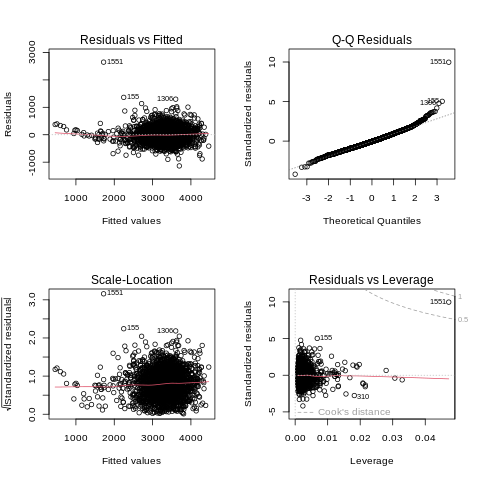

In [44]:
%%R
par(mfrow=c(2,2))
plot(reg_mod16)

Nel grafico in alto a sinistra i punti si presentano sparsi intorno alla media di zero.\
Nel grafico in alto a destra si osserva che i punti sono molto vicini alla bisettrice, quindi si può dire che i residui seguono la distribuzione normale.\
Nel grafico in basso a sinistra la nuvola di punti si distribuisce in maniera casuale e non sembrano esserci pattern, questo indica varianza costante.\
Nel grafico in basso a destra si osserva che solo un punto supera la soglia di avvertimento del 5%.



In [45]:
%%R
library("car")
outlierTest(reg_mod16)

      rstudent unadjusted p-value Bonferroni p
1551 10.175138         7.4370e-24   1.8592e-20
155   5.051632         4.6976e-07   1.1744e-03
1306  4.792611         1.7430e-06   4.3574e-03


In questo caso ci sono 3 outliers, proviamo a calcolare la distanza di Cook.

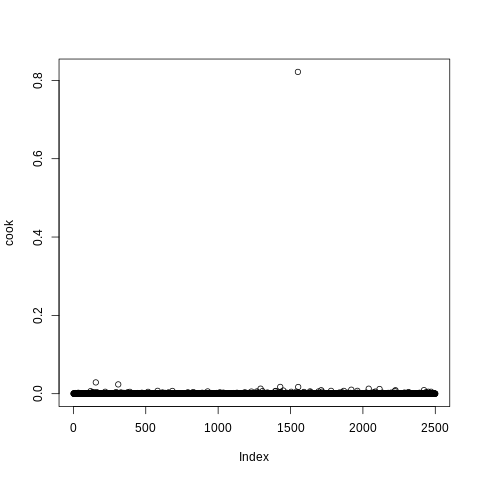

In [46]:
%%R
cook <- cooks.distance(reg_mod16)
plot(cook)

Da questo plot sembra essere veramente influente solo l'osservazione 1551.

In [ ]:
%%R
install.packages("lmtest")
library(lmtest)

In [48]:
%%R
bptest(reg_mod16)


	studentized Breusch-Pagan test

data:  reg_mod16
BP = 79.248, df = 5, p-value = 1.206e-15



In questo caso viene rifiutata l'ipotesi nulla e la varianza non viene considerata costante.

In [49]:
%%R
dwtest(reg_mod16)


	Durbin-Watson test

data:  reg_mod16
DW = 1.9572, p-value = 0.1423
alternative hypothesis: true autocorrelation is greater than 0



In questo caso non viene rifiutata l'ipotesi nulla, quindi i residui non sono autocorrelati.

In [50]:
%%R
shapiro.test(residuals(reg_mod16))


	Shapiro-Wilk normality test

data:  residuals(reg_mod16)
W = 0.97363, p-value < 2.2e-16



Viene rifiutata l'ipotesi di normalità.

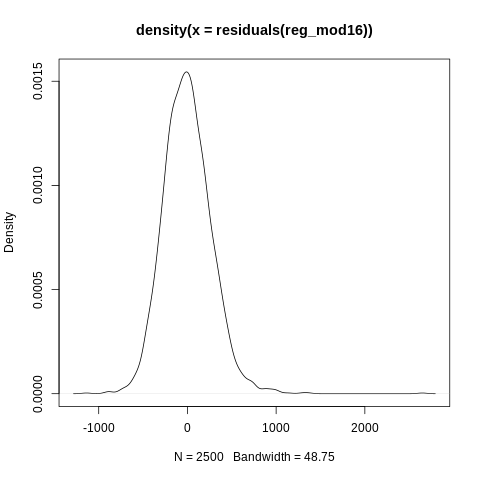

In [51]:
%%R
plot(density(residuals(reg_mod16)))

Nonostante il test di Shapiro Wilk rifiuti l'ipotesi di normalità, la densità dei residui assomiglia molto ad una Gaussiana centrata in 0.

Punto 6)

L'R quadro aggiustato di reg_mod16 è pari a 0.7316, ovvero una percentuale di varianza spiegata intorno al 73%. Questo indica una buona capacità del modello di fare previsioni. Tuttavia, dal momento che il modello scelto non è più solo lineare ma sono stati aggiunti dei termini con dipendenza non lineare, si possono considerare altre metriche per valutare la bontà di adattamento del modello, ad esempio si può controllare il mean square error (o la sua radice quadrata) sui dati su cui è stato addestrato il modello. \
In generale comunque per dare una risposta completa si dovrebbe prendere un set di dati non visti dal modello e provare a fare previsioni su questo nuovo set, perchè anche se l'R quadro aggiustato ha un valore abbastanza buono ciò non esclude che il modello possa soffrire di overfitting e non adattarsi bene a dati non visti.

In [52]:
%%R
y_prev <- predict(reg_mod16, newdata=neonati)

In [53]:
%%R
mse <- mean((neonati$Peso - y_prev)^2)
rmse <- sqrt(mse)
rmse

[1] 271.699


Si può dire che l'rmse è abbastanza basso, anche questo è un segnale positivo sulla bontà di adattamento del modello.

Punto 7)

Visto che non ci sono misure dall'ecografia, si può sostituire alle variabili lunghezza e cranio la media di lunghezza e cranio filtrata per Sesso=F, Gestazione=39 e N.gravidanze=3.

In [54]:
%%R
neonati_f <- neonati[neonati$Sesso=="F",]
neonati_f_39 <- neonati_f[neonati_f$Gestazione == 39,]
neonati_f_39_3 <- neonati_f_39[neonati_f_39$N.gravidanze==3, ]
media_lunghezza <- mean(neonati_f_39_3$Lunghezza)
media_cranio <- mean(neonati_f_39_3$Cranio)

In [55]:
%%R
nuovi_dati <- data.frame(Anni.madre=25, N.gravidanze=3,Fumatrici=0,Gestazione=39,
                         Lunghezza=media_lunghezza, Cranio=media_cranio,
                         Tipo.parto="Nat",
                         Ospedale="osp3",
                         Sesso="F")

In [60]:
%%R
prev <- predict(reg_mod16, newdata = nuovi_dati)
print(prev)

       1 
3227.586 


Il modello fornisce una previsione di 3227.586 grammi.

Punto 8)

In [ ]:
%%R
install.packages("ggplot2")

Per visualizzare graficamente le dipendenze tra variabili catturate dal modello, si può ad esempio provare a mettere in relazione lineare la variabile peso con la variabile lunghezza (anche se nel modello scelto in realtà la dipendenza non è proprio lineare ma avevamo considerato il fattore di interazione gestazione). Visto che ci sono differenze di peso tra maschi e femmine, si possono provare a visualizzare le due rette di regressione per i dati divisi tra maschi e femmine.  

`geom_smooth()` using formula = 'y ~ x'


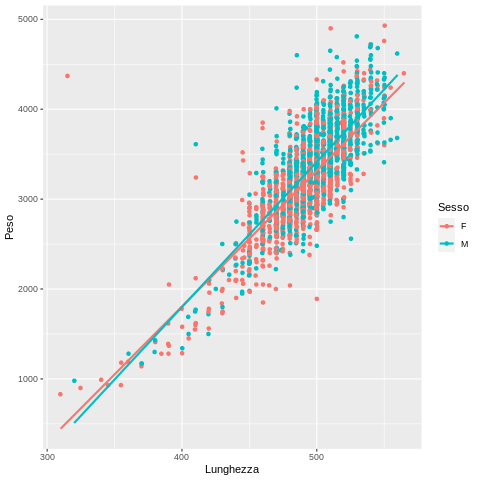

In [ ]:
%%R
library("ggplot2")
ggplot(data=neonati)+
  geom_point(aes(y=Peso,
                 x=Lunghezza,
                 col=Sesso),
             position="jitter")+
  geom_smooth(aes(y=Peso,
                 x=Lunghezza,
                 col=Sesso),se=F, method="lm")

Si può osservare che all'aumentare della lunghezza sembra che per i maschi ci sia un maggiore aumento di peso rispetto alle femmine.